In [1]:
import tensorflow as tf
from tensorflow import keras
import import_ipynb
from dataloader import get_LFW_X_df, get_y_df, data_prep
from model_arch import build_model
from hyperparameters import create_callback, EPOCHS, LEARNING_RATE, BATCH_SIZE
from predictions import generate_predictions, generate_csv
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

2023-10-22 17:02:07.173975: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 17:02:07.287087: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 17:02:07.288186: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 17:02:08.188956: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


importing Jupyter notebook from dataloader.ipynb
Tensorflow version: 2.12.0
importing Jupyter notebook from model_arch.ipynb
importing Jupyter notebook from hyperparameters.ipynb
Tensorflow version: 2.12.0
Tensorflow version: 2.12.0
importing Jupyter notebook from predictions.ipynb


In [2]:
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.12.0


In [3]:
data_filepath = "../data/csv/plant_data.csv"
checkpoint_filepath = "../model_weights/regression/simple_LFW"

In [4]:
callback = create_callback(
    checkpoint_filepath
)

In [5]:
df = pd.read_csv(data_filepath)
df['LFW_g'].mean()

61.29107942973524

In [6]:
X = get_LFW_X_df(data_filepath)
y = get_y_df(data_filepath, "LFW_g")
#X.tail()
X_train, X_test, y_train, y_test = data_prep(X, y)

In [7]:
model = build_model()
print('Input shape:', X_train[0].shape)

Input shape: ()


2023-10-22 17:02:10.009949: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-22 17:02:10.084620: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit (
    X_train, y_train,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks = [callback]
)

Epoch 1/350
 1/11 [=>............................] - ETA: 2s - loss: 6463.9971

11/11 [==============================] - 0s 10ms/step - loss: 6508.4062 - val_loss: 6542.2480
Epoch 2/350
11/11 [==============================] - 0s 2ms/step - loss: 6505.1050 - val_loss: 6539.0869
Epoch 3/350
11/11 [==============================] - 0s 2ms/step - loss: 6501.8433 - val_loss: 6535.8120
Epoch 4/350
11/11 [==============================] - 0s 2ms/step - loss: 6498.4199 - val_loss: 6532.4854
Epoch 5/350
11/11 [==============================] - 0s 2ms/step - loss: 6494.8755 - val_loss: 6529.1250
Epoch 6/350
11/11 [==============================] - 0s 2ms/step - loss: 6491.2954 - val_loss: 6525.6631
Epoch 7/350
11/11 [==============================] - 0s 2ms/step - loss: 6487.7324 - val_loss: 6522.0293
Epoch 8/350
11/11 [==============================] - 0s 2ms/step - loss: 6483.8018 - val_loss: 6518.4585
Epoch 9/350
11/11 [==============================] - 0s 2ms/step - loss: 6480.0732 - val_loss: 6514.6670
Epoch 10/350
11/11 [==============================] - 0s 2ms/step 

In [10]:
model.save(checkpoint_filepath)

INFO:tensorflow:Assets written to: ../model_weights/regression/simple_LFW/assets


INFO:tensorflow:Assets written to: ../model_weights/regression/simple_LFW/assets


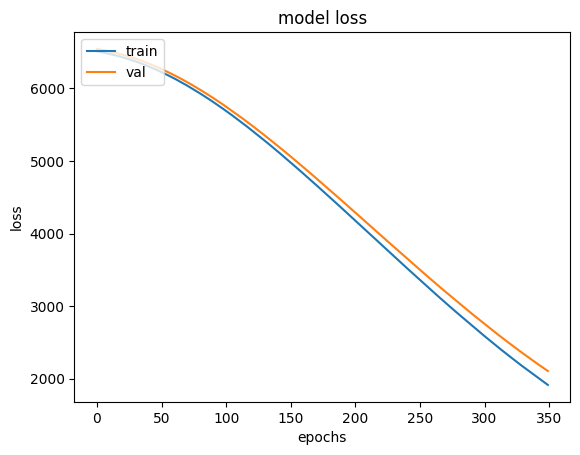

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 1729.2672


1729.2672119140625

In [13]:
figures_filepath = "../figures/simple_LFW_error_csv"
generate_csv(model, X_test, y_test, "LFW_predictions", "LFW_actual", figures_filepath)

2/2 [==============================] - 0s 2ms/step
